In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(10)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,CONFIRMED,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,CONFIRMED,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,FALSE POSITIVE,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,CONFIRMED,0,0,0,0,16.068647,1.088000e-05,-1.088000e-05,173.621937,0.000517,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
X = df[['koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']]
y = df["koi_disposition"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8744, 40) (8744, 1)


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

array([1, 1, 2, ..., 0, 2, 2])

In [5]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class:

Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']


Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CO

Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Origi

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Origina

Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original C

Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']


Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encod

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2


Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FA

------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POS

Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POS

Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CANDIDATE']
Encoded Label: 0
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 2
------------
Original Class: ['CONFIRMED']
Encoded Label: 1
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 

In [6]:
from keras.utils import to_categorical
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8017,0,1,1,0,0.806277,4.947000e-06,-4.947000e-06,131.785670,0.006720,-0.006720,...,-184.0,4.471,0.054,-0.229,0.996,0.324,-0.108,290.81723,38.539120,13.614
1233,0,1,1,0,3.582077,4.318000e-06,-4.318000e-06,355.515064,0.000864,-0.000864,...,-235.0,4.422,0.090,-0.195,0.993,0.283,-0.131,296.07822,43.136940,15.193
2592,0,0,0,0,5.060923,2.616000e-05,-2.616000e-05,134.473160,0.004730,-0.004730,...,-112.0,4.492,0.048,-0.112,0.911,0.121,-0.060,289.91742,40.828606,13.346
4770,0,1,0,1,8.480304,3.320000e-07,-3.320000e-07,135.854534,0.000031,-0.000031,...,-169.0,3.946,0.195,-0.105,2.210,0.375,-0.563,298.80020,46.665539,7.631
6632,0,0,0,1,4.994716,4.495000e-05,-4.495000e-05,136.183300,0.009500,-0.009500,...,-194.0,3.706,0.320,-0.080,2.830,0.458,-1.068,282.58215,46.815510,13.352


# Pre-processing

Scale the data using the MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [22]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Train the Support Vector Machine

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

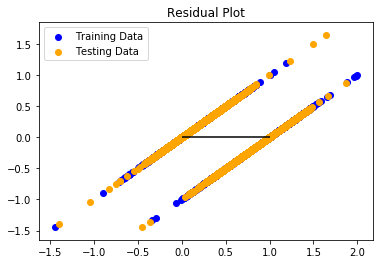

In [26]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1018337026697428, R2: 0.5149091342358483


In [29]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5214700880860828
Testing Data Score: 0.5149091342358483


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)